# P4W2: Evaluatiemetrieken

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score 
from plot_roc import plot_roc

## 1. Data

In [2]:
iris = pd.read_csv('iris.csv', delimiter=',', decimal='.')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 2. Model

In [3]:
X = iris[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = iris['target']
model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis()

## 3. Confusion matrix

In [4]:
real= iris.target
listoflabels = sorted(real.unique())
print(listoflabels)
predicted = model.predict(X)
conf_matrix = confusion_matrix(y_true=real,y_pred=predicted,labels = listoflabels) 
conf_matrix

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

<Figure size 640x480 with 0 Axes>

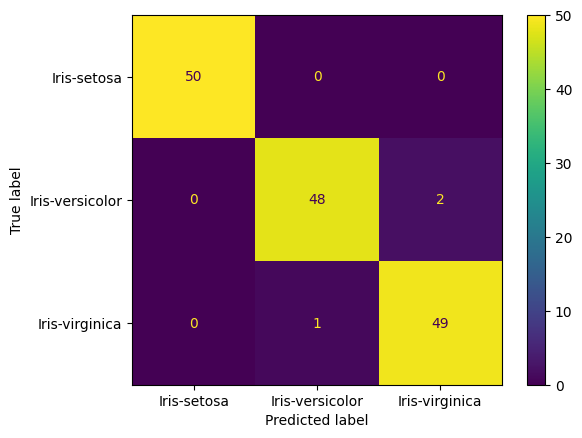

In [5]:
plt.figure()
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=listoflabels)
cmd.plot()
plt.show()

## 4. Metrics: Precision, Recall, F<sub>1</sub>

In [6]:
print(listoflabels)
print(accuracy_score(y_true=real,y_pred=predicted))
precision_recall_fscore_support(y_true=real,y_pred=predicted,labels=listoflabels, beta=1.0)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
0.98


(array([1.        , 0.97959184, 0.96078431]),
 array([1.  , 0.96, 0.98]),
 array([1.        , 0.96969697, 0.97029703]),
 array([50, 50, 50], dtype=int64))

## 5. ROC

In [7]:
# Stap 1: Data
biopsy = pd.read_csv('biopsy.csv', delimiter=';')

In [8]:
# Stap 2: Maak een model
X = biopsy[['V1']]
#X = biopsy[['V1','V2']]
y = biopsy['class']
listoflabels = sorted(y.unique())
model = LinearDiscriminantAnalysis()
model.fit(X,y)

LinearDiscriminantAnalysis()

<Figure size 640x480 with 0 Axes>

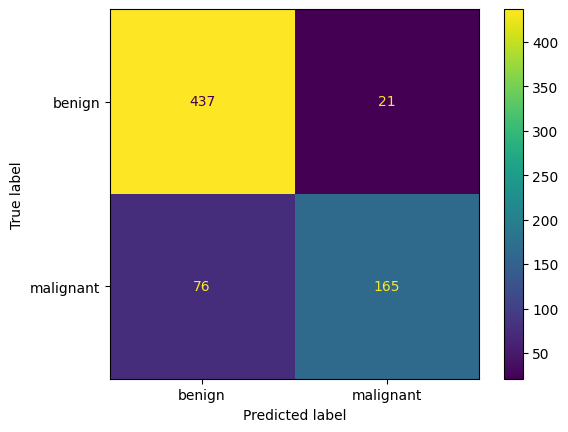

In [9]:
# Stap 3: Confusion matrix
predicted = model.predict(X)
conf_matrix = confusion_matrix(y_true=y, y_pred=predicted, labels=listoflabels) 
plt.figure()
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=listoflabels)
cmd.plot()
plt.show()

In [10]:
# Stap 4: Bereken de metrieken
print(accuracy_score(y_true=y,y_pred=predicted))
print(listoflabels)
precision_recall_fscore_support(y_true=y,y_pred=predicted, labels=listoflabels, beta=1.0)

0.8612303290414879
['benign', 'malignant']


(array([0.85185185, 0.88709677]),
 array([0.95414847, 0.6846473 ]),
 array([0.90010299, 0.77283372]),
 array([458, 241], dtype=int64))

[[0.94862476 0.05137524]
 [0.98221229 0.01778771]
 [0.6737008  0.3262992 ]
 [0.86061581 0.13938419]
 [0.86061581 0.13938419]]
694       benign
695       benign
696    malignant
697    malignant
698    malignant
Name: class, dtype: object
694    1
695    1
696    0
697    0
698    0
Name: class, dtype: int64


C:\Users\depaepeg\AppData\Local\Temp\ipykernel_15340\1268171014.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_true = y.replace(to_replace=['benign','malignant'], value=[1,0]) # '1' bij 'benign'


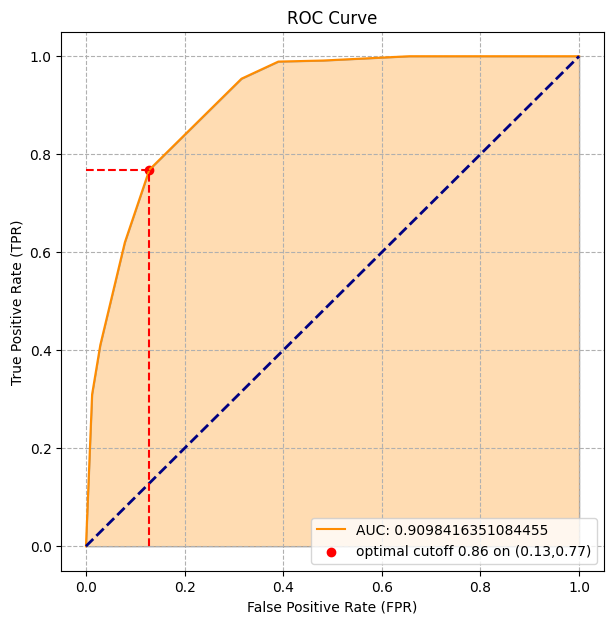

In [11]:
# Stap 5: Plot de ROC curve mbv de zelfgemaakte functie
# We nemen 'benign' als 'positive'
y_true = y.replace(to_replace=['benign','malignant'], value=[1,0]) # '1' bij 'benign'
y_pred = model.predict_proba(X) # kolom 0 = kans 'benign', kolom 1 = kans 'malignant' -> labels gesorteerd
print(y_pred[-5:])
print(y[-5:])
print(y_true[-5:])
y_pred = y_pred[:,0] # 'benign' is kolom 0
plot_roc(y_true, y_pred)

In [12]:
roc_auc_score(y_true, y_pred)

0.9098416351084455